# SI671 Final Project

*Author: Youheng Fu (youhfu@umich.edu)*

*Date: 2023-12-05*

## Part1: Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
crime_df = pd.read_csv('./Crime_Data_from_2020_to_Present.csv')
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           743817 non-null  int64  
 1   Date Rptd       743817 non-null  object 
 2   DATE OCC        743817 non-null  object 
 3   TIME OCC        743817 non-null  int64  
 4   AREA            743817 non-null  int64  
 5   AREA NAME       743817 non-null  object 
 6   Rpt Dist No     743817 non-null  int64  
 7   Part 1-2        743817 non-null  int64  
 8   Crm Cd          743817 non-null  int64  
 9   Crm Cd Desc     743817 non-null  object 
 10  Mocodes         641793 non-null  object 
 11  Vict Age        743817 non-null  int64  
 12  Vict Sex        646777 non-null  object 
 13  Vict Descent    646771 non-null  object 
 14  Premis Cd       743808 non-null  float64
 15  Premis Desc     743393 non-null  object 
 16  Weapon Used Cd  258193 non-null  float64
 17  Weapon Des

In [4]:
crime_df.nunique()

DR_NO             743817
Date Rptd           1266
DATE OCC            1266
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1198
Part 1-2               2
Crm Cd               138
Crm Cd Desc          138
Mocodes           250609
Vict Age             102
Vict Sex               4
Vict Descent          20
Premis Cd            312
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             140
Crm Cd 2             122
Crm Cd 3              36
Crm Cd 4               6
LOCATION           62345
Cross Street        9343
LAT                 5389
LON                 4965
dtype: int64

In [5]:
crime_df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           102024
Vict Age               0
Vict Sex           97040
Vict Descent       97046
Premis Cd              9
Premis Desc          424
Weapon Used Cd    485624
Weapon Desc       485624
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          688731
Crm Cd 3          741978
Crm Cd 4          743763
LOCATION               0
Cross Street      624067
LAT                    0
LON                    0
dtype: int64

In [6]:
crime_type = crime_df['Crm Cd Desc'].value_counts()
crime_type.head(10)

Crm Cd Desc
VEHICLE - STOLEN                                           79513
BATTERY - SIMPLE ASSAULT                                   58896
THEFT OF IDENTITY                                          48155
BURGLARY FROM VEHICLE                                      46016
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    45626
BURGLARY                                                   45164
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             42616
THEFT PLAIN - PETTY ($950 & UNDER)                         38065
INTIMATE PARTNER - SIMPLE ASSAULT                          37508
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            29021
Name: count, dtype: int64

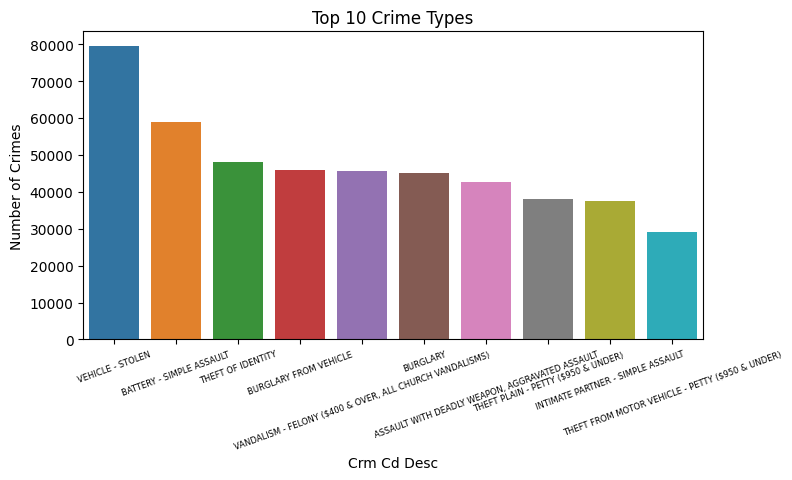

In [20]:
# histogram of Top 10 crime types
plt.figure(figsize=(8,4))
sns.barplot(x=crime_type.head(10).index, y=crime_type.head(10).values)
plt.xticks(rotation=20, fontsize=6)
plt.ylabel('Number of Crimes')
plt.title('Top 10 Crime Types')
plt.show()

In [7]:
top6_crime = crime_type.head(6)
# only keep data with top 6 crime type
type_df = crime_df[crime_df['Crm Cd Desc'].isin(top6_crime.index)]
type_df.shape

(323370, 28)

In [8]:
# lowercased all columns
type_df.columns = type_df.columns.str.lower()

## Part2: Time Series Analysis

In [21]:
# change date reported to datetime
type_df['date_rptd'] = type_df['date rptd'].apply(lambda x: x.split()[0])
type_df['date_rptd'] = pd.to_datetime(type_df['date_rptd'], format='%m/%d/%Y')
type_df['date_rptd'].head()

0    2020-01-08
1    2020-01-02
4    2020-01-01
10   2020-01-04
18   2021-11-22
Name: date_rptd, dtype: datetime64[ns]

In [22]:
type_df.columns

Index(['dr_no', 'date rptd', 'date occ', 'time occ', 'area', 'area name',
       'rpt dist no', 'part 1-2', 'crm cd', 'crm cd desc', 'mocodes',
       'vict age', 'vict sex', 'vict descent', 'premis cd', 'premis desc',
       'weapon used cd', 'weapon desc', 'status', 'status desc', 'crm cd 1',
       'crm cd 2', 'crm cd 3', 'crm cd 4', 'location', 'cross street', 'lat',
       'lon', 'date_rptd'],
      dtype='object')

<Axes: xlabel='date_rptd'>

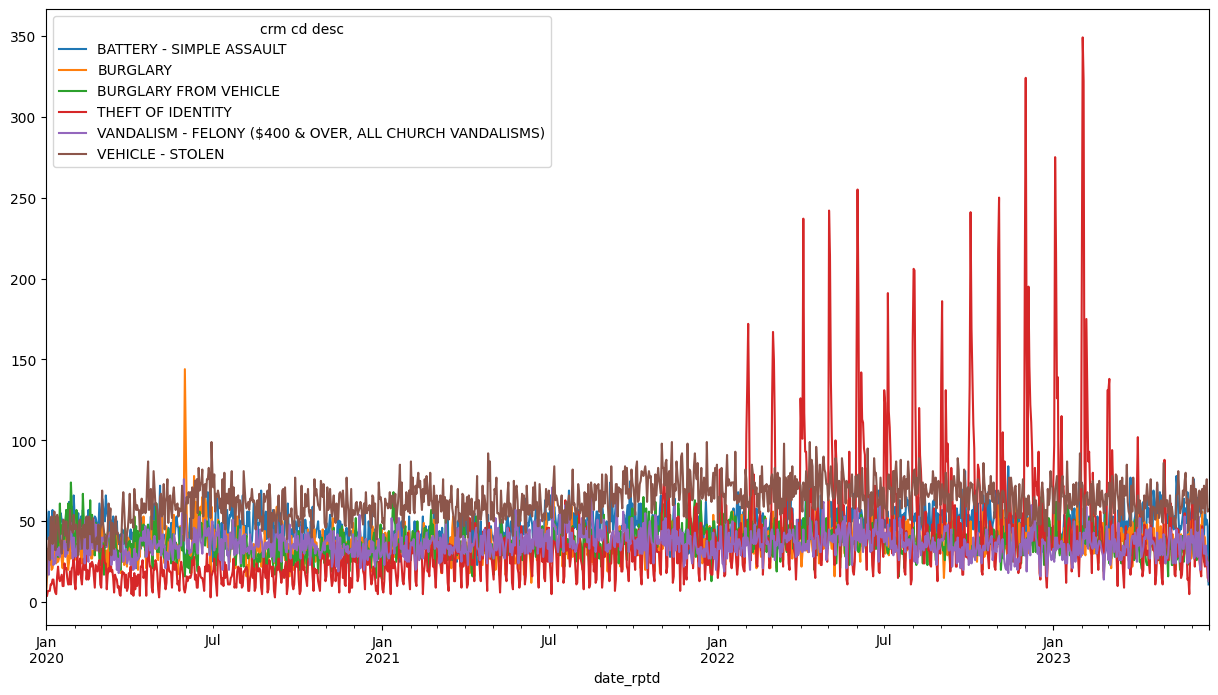

In [23]:
# plot date reported time series with top 6 crime type
# sum up each crime type by date
type_df.groupby(['date_rptd', 'crm cd desc']).size().unstack().plot(figsize=(15, 8))

In [24]:
# only keep data with date in 2020
type_new = type_df[type_df['date_rptd'].dt.year == 2022]
# sum up each crime type by date
type_2022 = type_new.groupby(['date_rptd', 'crm cd desc']).size().unstack()
type_2022.iloc[:,[0]]

crm cd desc,BATTERY - SIMPLE ASSAULT
date_rptd,
2022-01-01,47
2022-01-02,40
2022-01-03,37
2022-01-04,39
2022-01-05,43
...,...
2022-12-27,34
2022-12-28,37
2022-12-29,44


Text(0.5, 1.0, 'Number of Crimes by Date in 2022')

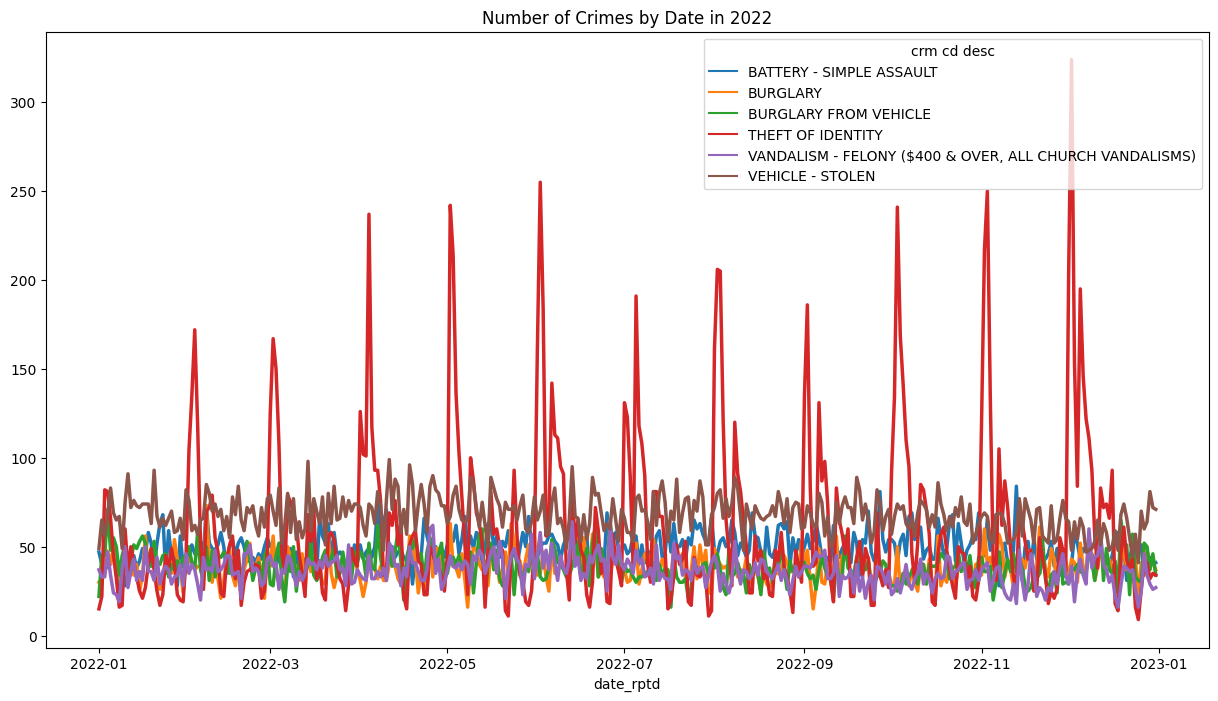

In [25]:
plt.figure(figsize=(15, 8))
# all by lines
sns.lineplot(data=type_2022, linewidth=2.5, dashes=False)
plt.title('Number of Crimes by Date in 2022')

### seasonal component

In [26]:
# seasonal decomposition with additive model
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0, 0.5, 'Residual')

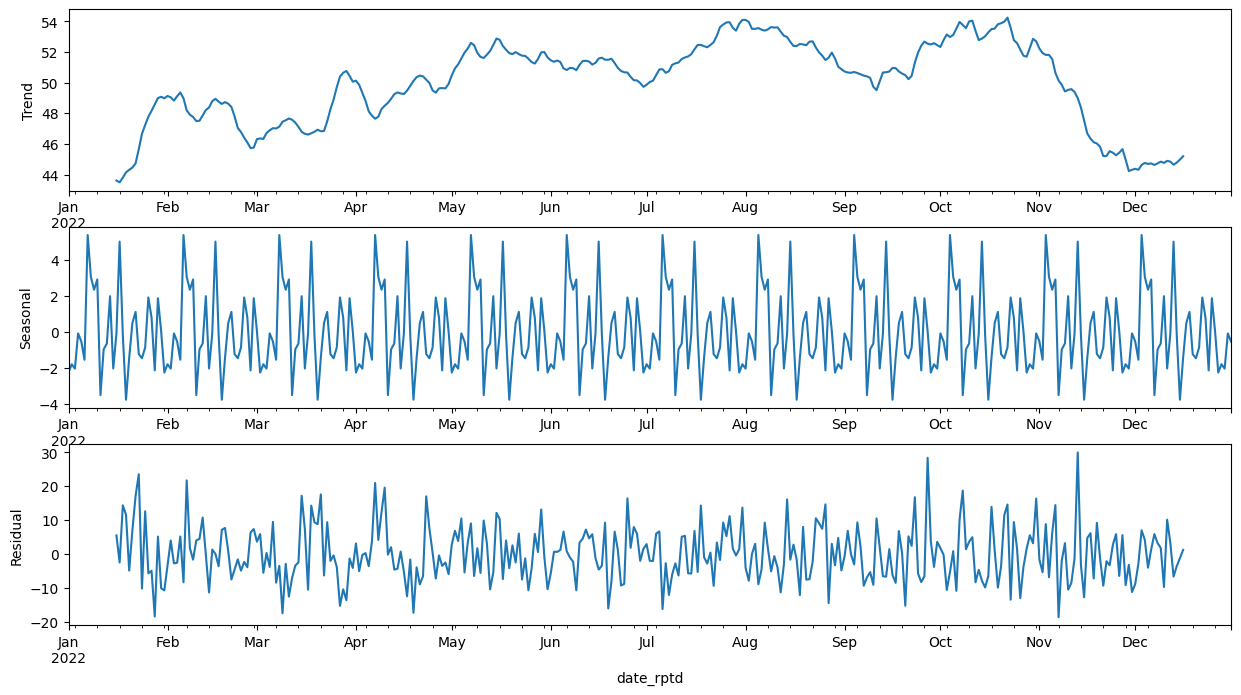

In [78]:
# seasonal decomposition with additive model
decomposition = seasonal_decompose(type_2022.iloc[:,[0]], model='additive', period=30)
# plot
fig, ax = plt.subplots(3, 1, figsize=(15, 8))
# plot trend
decomposition.trend.plot(ax=ax[0])
ax[0].set_ylabel('Trend')
# plot seasonal
decomposition.seasonal.plot(ax=ax[1])
ax[1].set_ylabel('Seasonal')
# plot residual
decomposition.resid.plot(ax=ax[2])
ax[2].set_ylabel('Residual')


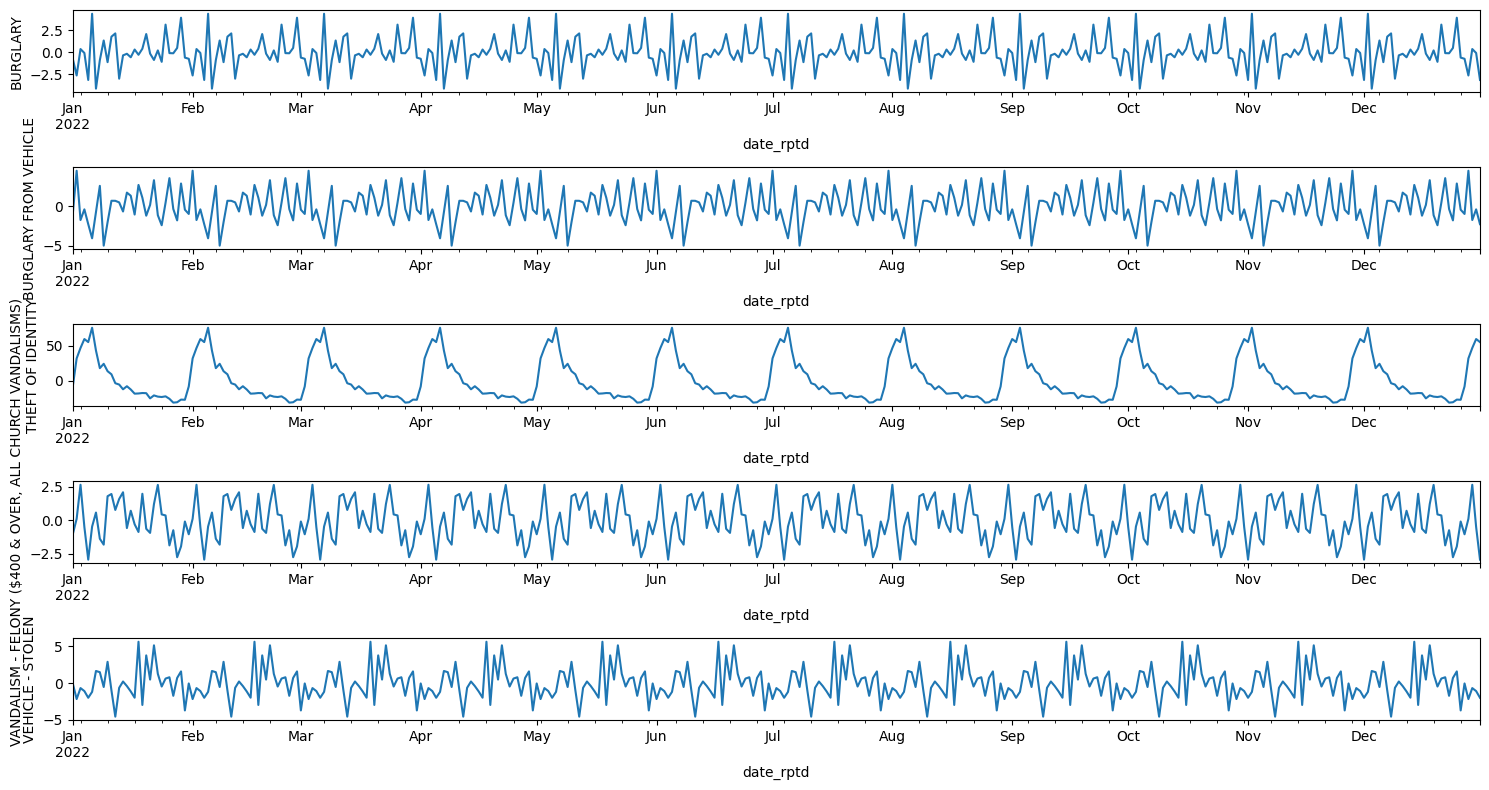

In [30]:
# other crime types seasonal component
# seasonal decomposition with additive model
fig, ax = plt.subplots(5, 1, figsize=(15, 8))
for i in range(1, 6):
    decomposition = seasonal_decompose(type_2022.iloc[:,[i]],
                                       model='additive',
                                       period=30)
    # plot    
    # plot seasonal
    decomposition.seasonal.plot(ax = ax[i-1])
    ax[i-1].set_ylabel(type_2022.columns[i])
plt.tight_layout()

### stationary testing

In [33]:
# ad-fuller test
from statsmodels.tsa.stattools import adfuller
for i in range(6):
    _, p_val, *_ = adfuller(type_2022.iloc[:,[i]])
    print(f'p-value: {p_val}')

p-value: 2.894571100032431e-13
p-value: 0.005061287785976048
p-value: 0.001037929986437476
p-value: 1.739934682970327e-10
p-value: 0.0008962597173694904
p-value: 0.15115260405678171


In [84]:
# rolling mean
# rolling mean
type_2022_rm = type_2022.rolling(window=3).mean()
col5 = type_2022_rm.iloc[:,[5]]

_, p_value, *_ =  adfuller(col5.dropna())
print(f'p-value: {p_value}')

p-value: 0.09043117802504363


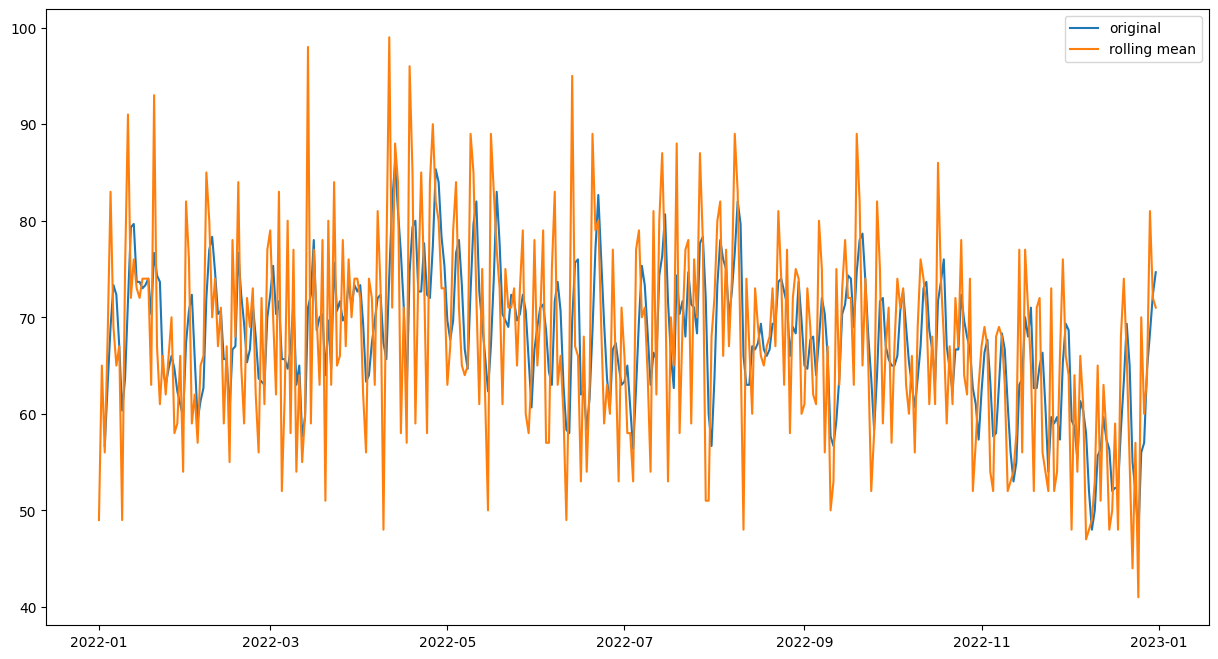

In [89]:
# plot col5
plt.figure(figsize=(15, 8))
plt.plot(col5, label='original')
plt.plot(type_2022.iloc[:,[5]], label='rolling mean')
plt.legend()
plt.show()


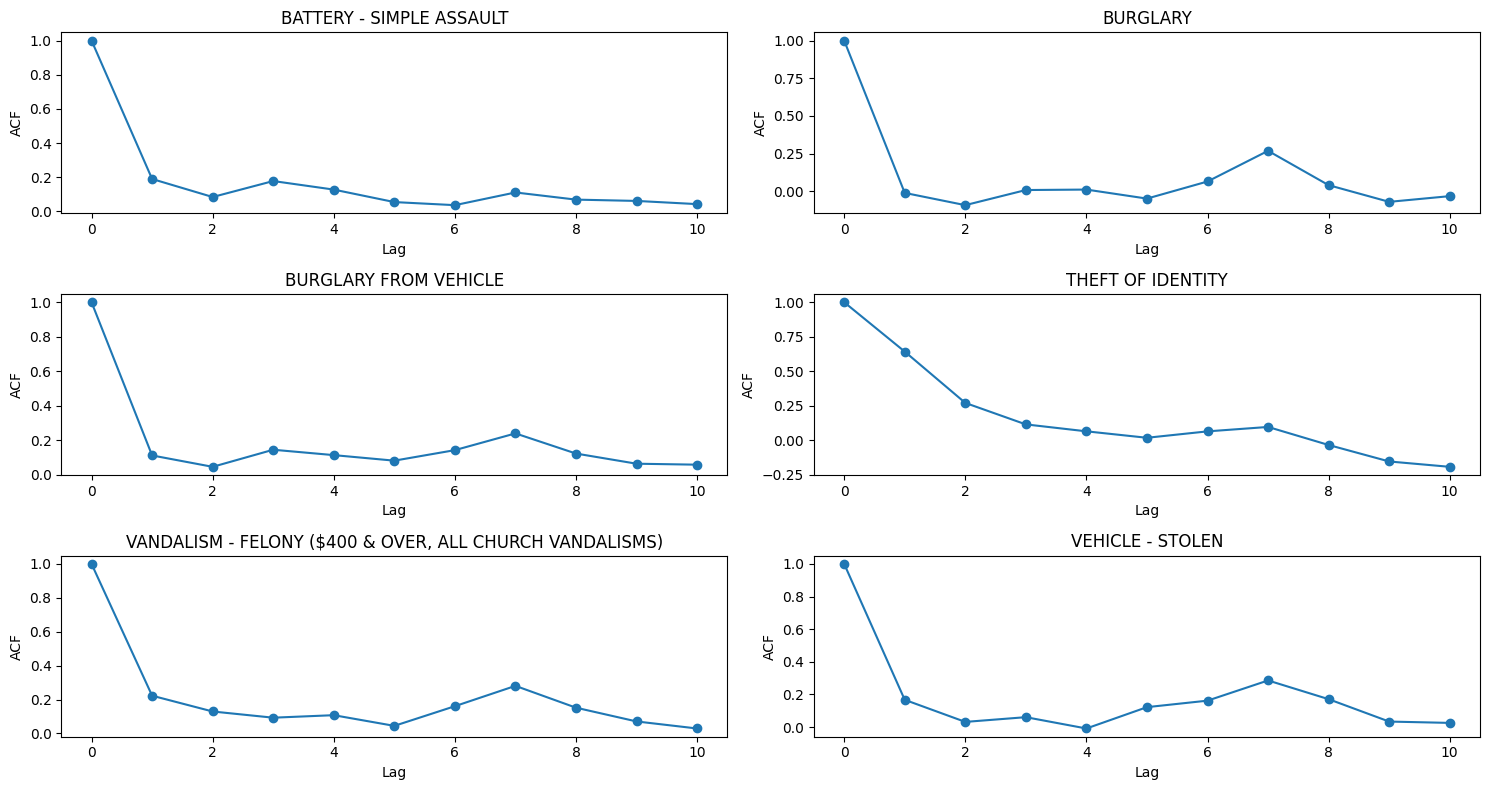

In [39]:
# ACF
from statsmodels.tsa.stattools import acf, pacf

max_lag = 10
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in range(6):
    acf_1 = acf(type_2022.iloc[:,[i]], nlags=max_lag)

    # plot
    ax[i//2][i%2].plot(acf_1, marker='o')
    ax[i//2][i%2].set_title(type_2022.columns[i])
    ax[i//2][i%2].set_xlabel('Lag')
    ax[i//2][i%2].set_ylabel('ACF')
plt.tight_layout()

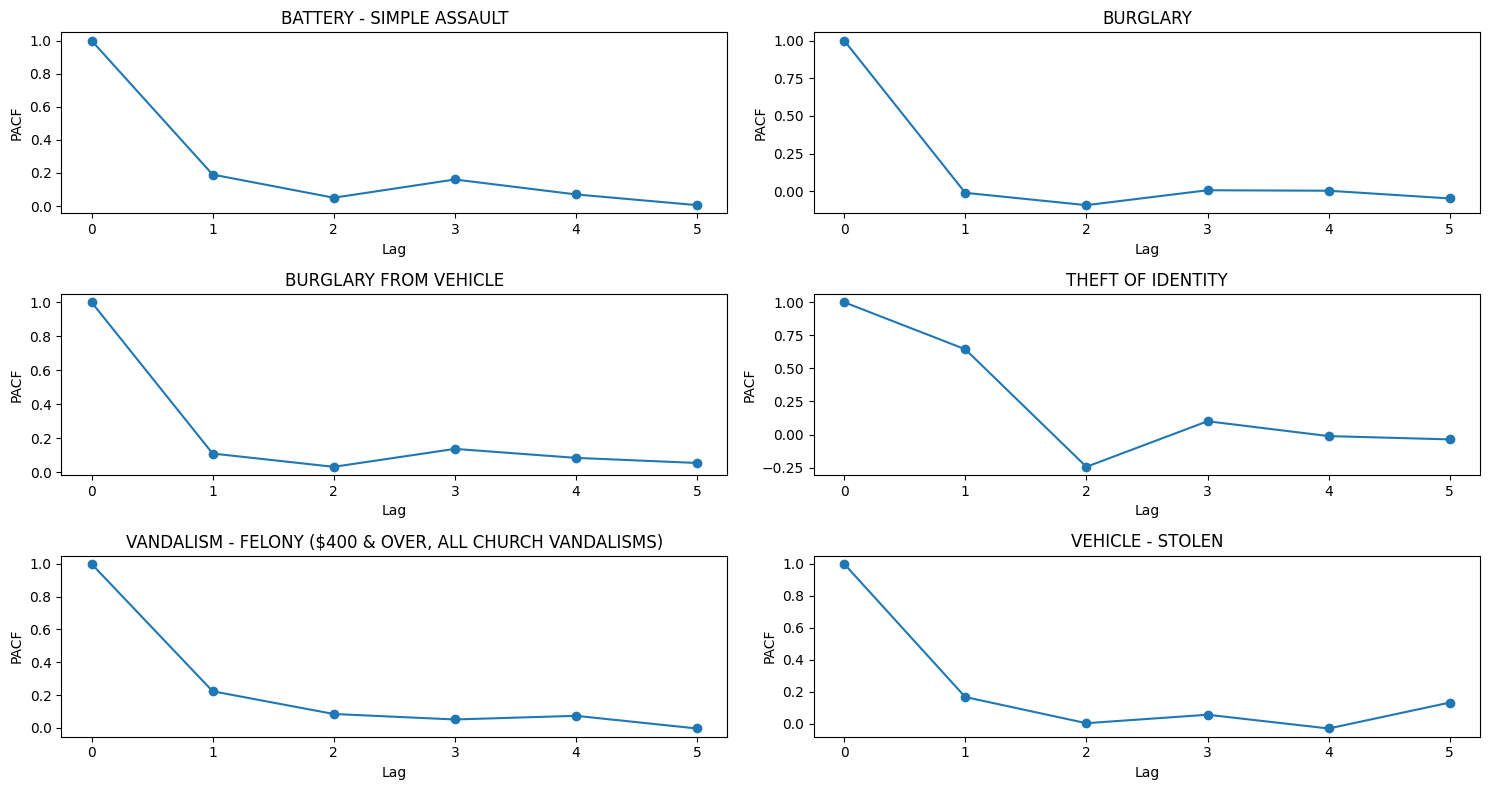

In [38]:
# PACF
max_lag = 5

fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in range(6):
    pacf_1 = pacf(type_2022.iloc[:,[i]], nlags=max_lag)
    
    # plot
    ax[i//2][i%2].plot(pacf_1, marker='o')
    ax[i//2][i%2].set_title(type_2022.columns[i])
    ax[i//2][i%2].set_xlabel('Lag')
    ax[i//2][i%2].set_ylabel('PACF')
plt.tight_layout()



In [31]:
# time series prediction
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:

# use data in 2022 as train data
train = type_2022.iloc[:,[3]]
# use data in 2023 as test data
test = type_df[type_df['date_rptd'].dt.year == 2023]
test = test.groupby(['date_rptd', 'crm cd desc']).size().unstack()
test = test.iloc[:,[3]]
list(train.columns)


['THEFT OF IDENTITY']

In [120]:
# fit ARIMA model
train_ar = type_2022.iloc[:,[0]]
test_ar = type_df[type_df['date_rptd'].dt.year == 2023]
test_ar = test_ar.groupby(['date_rptd', 'crm cd desc']).size().unstack()
test_ar = test_ar.iloc[:,[0]]
model = ARIMA(train_ar, order=(2,1,1))
model_fit = model.fit()
# make prediction

pred = model_fit.forecast(steps=test_ar.shape[0])

model_fit.forecast(steps=test_ar.shape[0])

# evaluate model
# calculate RMSE for each crime type
rmse = np.sqrt(mean_squared_error(test_ar, pred, squared=False))
print('RMSE: %.3f' % rmse)
# calculate MAE for each crime type
mae = mean_absolute_error(test_ar, pred)
print('MAE: %.3f' % mae)

RMSE: 3.721
MAE: 10.771


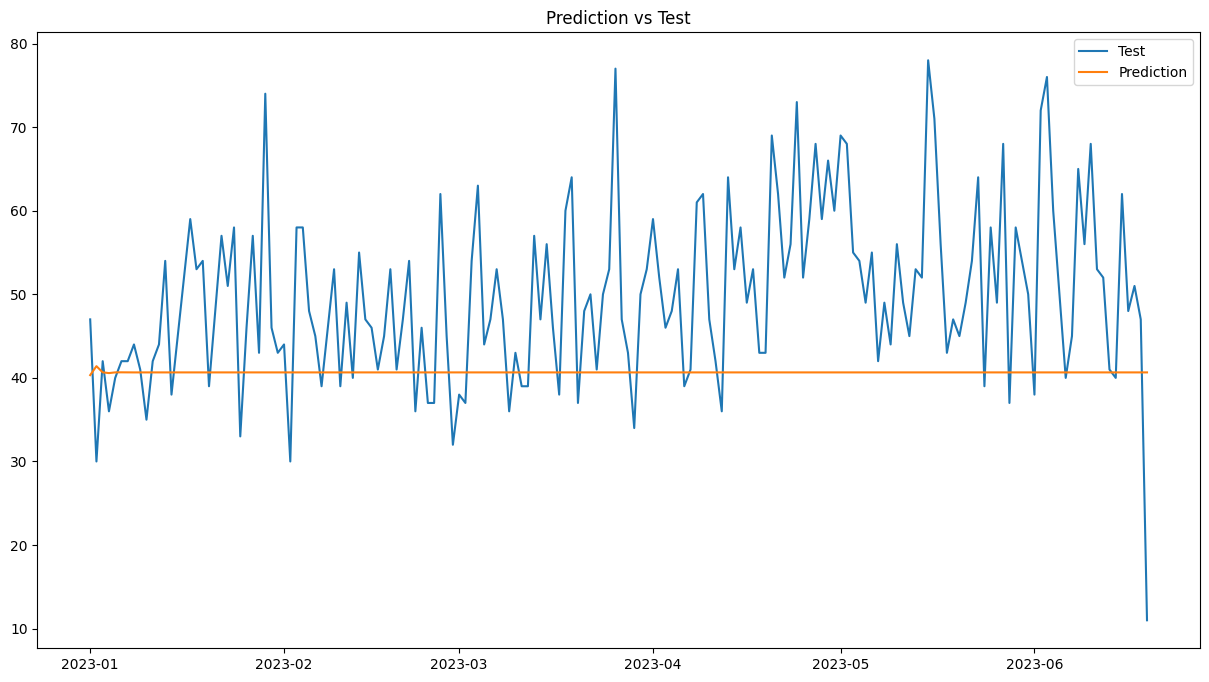

In [121]:
# plot prediction
plt.figure(figsize=(15, 8))
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.title('Prediction vs Test')
plt.show()

In [54]:
# seasonal ARIMA model

# fit SARIMA model
model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,30))
model_fit = model.fit()

# make prediction
pred = model_fit.forecast(steps=test.shape[0])

# evaluate model
# calculate RMSE for each crime type
rmse = np.sqrt(mean_squared_error(test, pred, squared=False))
print('RMSE: %.3f' % rmse)
# calculate MAE for each crime type
mae = mean_absolute_error(test, pred)
print('MAE: %.3f' % mae)


RMSE: 7.130
MAE: 33.190


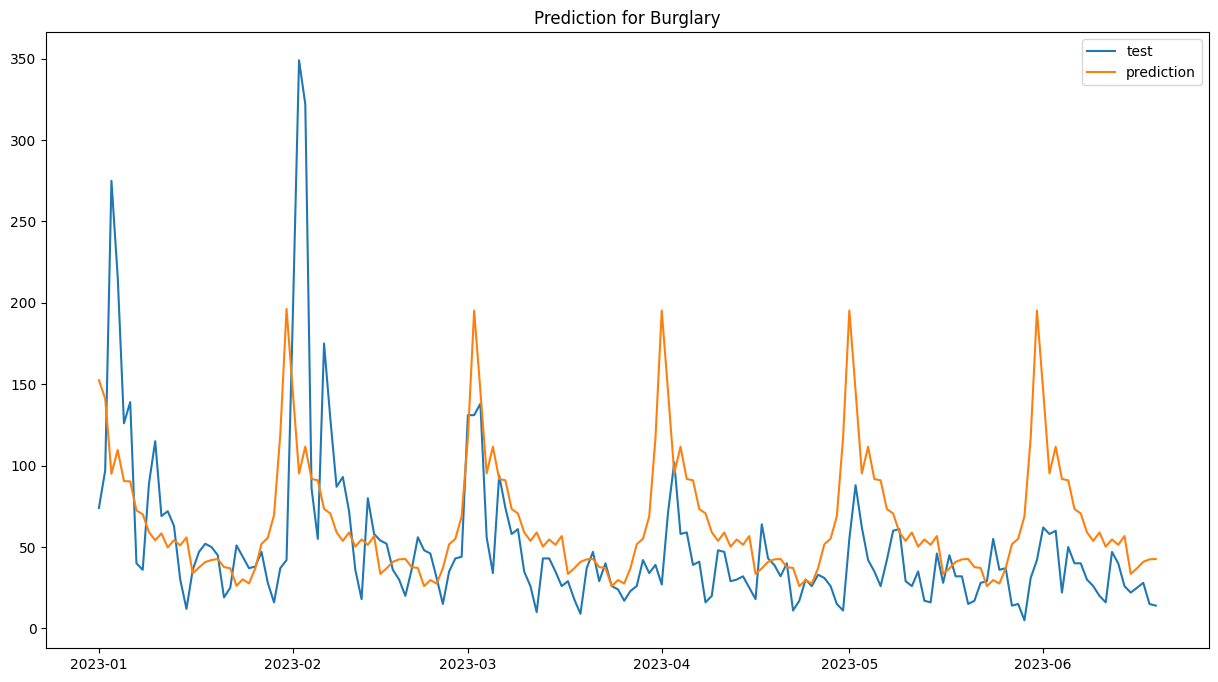

In [55]:
# plot prediction
plt.figure(figsize=(15, 8))
plt.plot(test, label='test')
plt.plot(pred, label='prediction')
plt.legend()
plt.title('Prediction for Burglary')
plt.show()

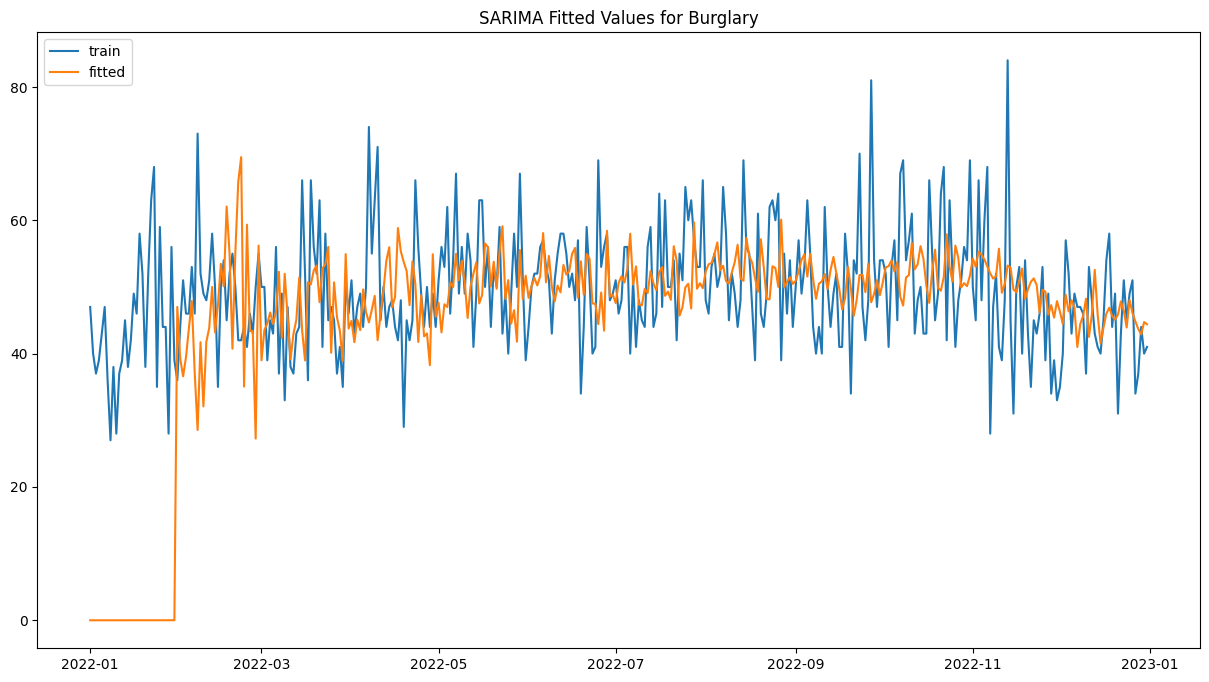

In [51]:
# plot fitted value
plt.figure(figsize=(15, 8))
plt.plot(train, label='train')
plt.plot(model_fit.fittedvalues, label='fitted')
plt.legend(loc='upper left')
plt.title('SARIMA Fitted Values for Burglary')
plt.show()

In [40]:
type_2023 = type_df[type_df['date_rptd'].dt.year == 2023]
type_2023 = type_2023.groupby(['date_rptd', 'crm cd desc']).size().unstack()

RMSE for BATTERY - SIMPLE ASSAULT: 3.3338166785470853
MAE for BATTERY - SIMPLE ASSAULT: 8.446441626674506
RMSE for BURGLARY: 2.9892262196923447
MAE for BURGLARY: 7.20529650389146
RMSE for BURGLARY FROM VEHICLE: 3.2542150619220442
MAE for BURGLARY FROM VEHICLE: 8.84339429346916
RMSE for THEFT OF IDENTITY: 7.129805720451173
MAE for THEFT OF IDENTITY: 33.189744815770986
RMSE for VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS): 2.8305752348191295
MAE for VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS): 6.417861169601584
RMSE for VEHICLE - STOLEN: 3.163220779479911
MAE for VEHICLE - STOLEN: 8.217691529806881


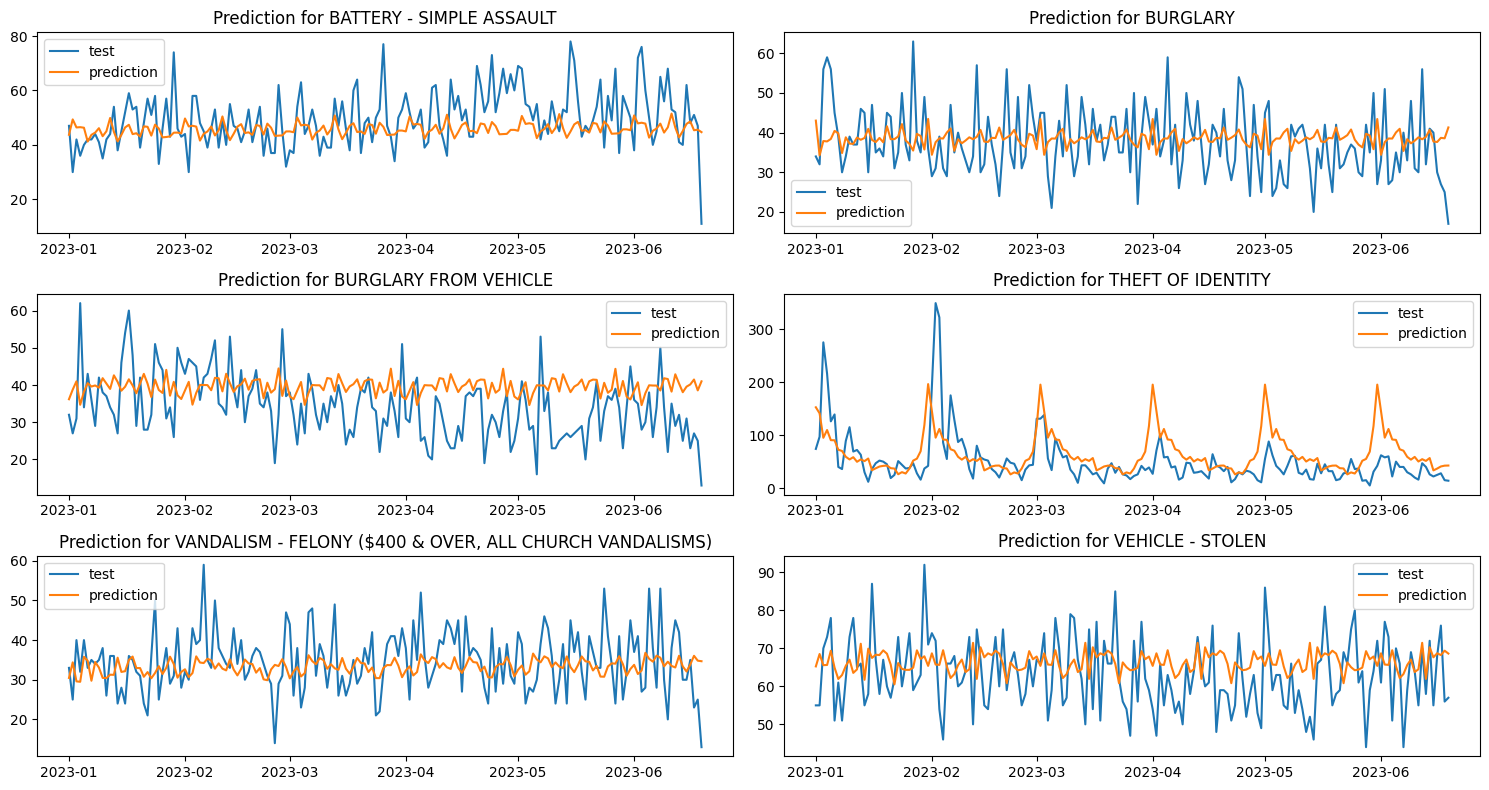

In [91]:
# repeat the process for all crime type, record RMSE and MAE
warnings.filterwarnings('ignore')
# SARIMA model
rmse_list = []
mae_list = []
fig, ax = plt.subplots(3, 2, figsize=(15, 8))

for i in range(6):
    # use data in 2022 as train data
    train = type_2022.iloc[:,[i]]
    # use data in 2023 as test data
    test = type_2023.iloc[:,[i]]

    # fit SARIMA model
  
    model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,30))
    model_fit = model.fit()

    # make prediction
    pred = model_fit.forecast(steps=test.shape[0])

    # evaluate model
    # calculate RMSE for each crime type
    rmse = np.sqrt(mean_squared_error(test, pred, squared=False))
    rmse_list.append(rmse)
    print(f'RMSE for {type_2022.columns[i]}: {rmse}')
    # calculate MAE for each crime type
    mae = mean_absolute_error(test, pred)
    mae_list.append(mae)
    print(f'MAE for {type_2022.columns[i]}: {mae}')

    # plot prediction
    ax[i//2][i%2].plot(test, label='test')
    ax[i//2][i%2].plot(pred, label='prediction')
    ax[i//2][i%2].legend()
    ax[i//2][i%2].set_title(f'Prediction for {type_2022.columns[i]}')
plt.tight_layout()

In [ ]:


metric_df = pd.DataFrame({'RMSE': rmse_list, 'MAE': mae_list}, 
                         index=type_2022.columns)

In [132]:
metric_df

,RMSE,MAE
crm cd desc,,
BATTERY - SIMPLE ASSAULT,3.375703,8.659403
BURGLARY,3.050859,7.671746
BURGLARY FROM VEHICLE,3.175766,8.304878
THEFT OF IDENTITY,7.484473,37.887160
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",2.918352,6.742480
VEHICLE - STOLEN,3.194062,7.952717


### Granger Causality

In [142]:
# granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
count = 0
# granger causality test for each crime type
for i in range(6):
    for j in range(6):
        if i != j:
            result = grangercausalitytests(type_2022.iloc[:,[i, j]],
                                           maxlag=3,
                                           verbose=False)
            if result[1][0]['ssr_ftest'][1] < 0.05:
                print(f'granger causality test for {type_2022.columns[i]}',
                      f'and {type_2022.columns[j]}')
                print(f'p-value: {result[1][0]["ssr_ftest"][1]}')
                print('reject null hypothesis')

granger causality test for BATTERY - SIMPLE ASSAULT and BURGLARY
p-value: 0.04519414932126986
reject null hypothesis
granger causality test for BURGLARY and VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
p-value: 0.01755068190750208
reject null hypothesis
granger causality test for BURGLARY FROM VEHICLE and THEFT OF IDENTITY
p-value: 0.033002026779520445
reject null hypothesis
granger causality test for VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) and BATTERY - SIMPLE ASSAULT
p-value: 0.00041618135409102165
reject null hypothesis
granger causality test for VEHICLE - STOLEN and BATTERY - SIMPLE ASSAULT
p-value: 0.017415086576235618
reject null hypothesis
granger causality test for VEHICLE - STOLEN and VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
p-value: 0.0005216672570894567
reject null hypothesis


### Part3: Network Analysis

In [60]:
crime_df.columns = crime_df.columns.str.lower()
crime_df.columns

Index(['dr_no', 'date rptd', 'date occ', 'time occ', 'area', 'area name',
       'rpt dist no', 'part 1-2', 'crm cd', 'crm cd desc', 'mocodes',
       'vict age', 'vict sex', 'vict descent', 'premis cd', 'premis desc',
       'weapon used cd', 'weapon desc', 'status', 'status desc', 'crm cd 1',
       'crm cd 2', 'crm cd 3', 'crm cd 4', 'location', 'cross street', 'lat',
       'lon'],
      dtype='object')

In [64]:
crime_df['date_rptd'] = crime_df['date rptd'].apply(lambda x: x.split()[0])
crime_df['date_rptd'] = pd.to_datetime(crime_df['date_rptd'], format='%m/%d/%Y')
crime_df['date_rptd'].head()

0   2020-01-08
1   2020-01-02
2   2020-04-14
3   2020-01-01
4   2020-01-01
Name: date_rptd, dtype: datetime64[ns]

In [68]:
area_df = crime_df.loc[:, ['area', 'date rptd']]
area_df.head()

,area,date rptd
0,3,01/08/2020 12:00:00 AM
1,1,01/02/2020 12:00:00 AM
2,1,04/14/2020 12:00:00 AM
3,15,01/01/2020 12:00:00 AM
4,19,01/01/2020 12:00:00 AM


In [69]:
# convert date reported to datetime
area_df['date_rptd'] = area_df['date rptd'].apply(lambda x: x.split()[0])
area_df['date_rptd'] = pd.to_datetime(area_df['date_rptd'], format='%m/%d/%Y')
area_2022 = area_df[area_df['date_rptd'].dt.year == 2022]
area_2022.head()

,area,date rptd,date_rptd
45,14,06/15/2022 12:00:00 AM,2022-06-15
186,3,07/22/2022 12:00:00 AM,2022-07-22
236,4,01/28/2022 12:00:00 AM,2022-01-28
250,10,01/25/2022 12:00:00 AM,2022-01-25
429,6,01/30/2022 12:00:00 AM,2022-01-30


In [154]:
area_2022 = area_2022.groupby(['date_rptd', 'area']).size().unstack()
area_2022.head()

area,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
date_rptd,,,,,,,,,,,,,,,,,,,,,
2022-01-01,30,29,31,17,13,39,22,14,6,27,...,31,27,17,21,22,9,33,17,13,19
2022-01-02,24,32,21,23,21,26,24,23,19,14,...,33,14,50,22,19,19,23,28,13,18
2022-01-03,46,27,40,33,19,35,23,23,19,29,...,43,21,46,31,23,27,30,17,47,25
2022-01-04,63,29,43,23,35,37,51,30,35,30,...,29,26,42,27,31,21,25,30,44,32
2022-01-05,41,38,28,32,24,28,21,34,23,29,...,36,27,36,41,27,33,24,26,30,41


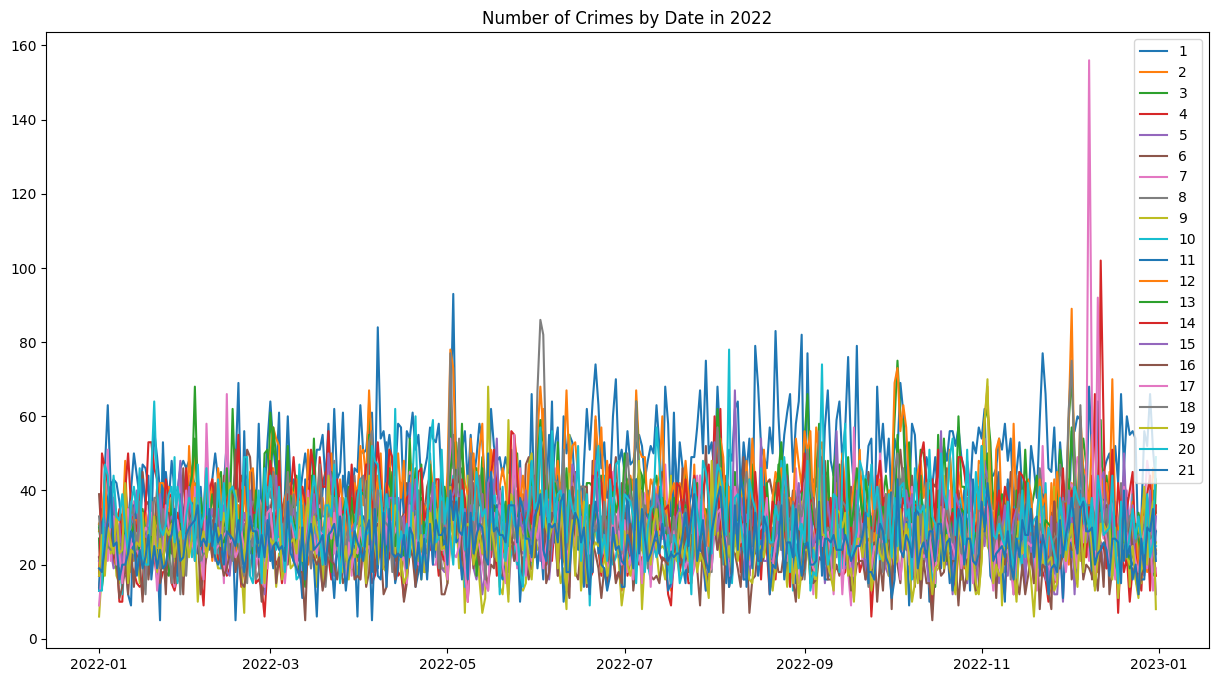

In [155]:
# plot time series for each area
plt.figure(figsize=(15, 8))
plt.plot(area_2022)
plt.legend(area_2022.columns)
plt.title('Number of Crimes by Date in 2022')
plt.show()

In [157]:
# DTW for pairwise area
def dtw_cost(series1, series2):
    m = len(series1)
    n = len(series2)

    # initialize cost matrix
    cost = np.zeros((m+1, n+1))
    cost[:, :] = np.inf
    cost[0, 0] = 0

    # calculate cost matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            distance = abs(series1[i-1] - series2[j-1])
            cost[i, j] = distance + min(cost[i-1, j],
                                        cost[i, j-1],
                                        cost[i-1, j-1])
    return cost[-1, -1]

In [170]:
dtw_cost(area_2022.iloc[:,0], area_2022.iloc[:,2])

3131.0

In [174]:
area_type = crime_df.loc[:, ['area', 'crm cd desc', 'date_rptd']]
area_type = area_type[area_type['date_rptd'].dt.year == 2022]
area_type.head()

,area,crm cd desc,date_rptd
45,14,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2022-06-15
186,3,THEFT OF IDENTITY,2022-07-22
236,4,OTHER MISCELLANEOUS CRIME,2022-01-28
250,10,THEFT OF IDENTITY,2022-01-25
429,6,THEFT OF IDENTITY,2022-01-30


In [179]:
area_type_df = area_type.groupby(['area', 'crm cd desc']).size().unstack()
area_type_df.head()

crm cd desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
area,,,,,,,,,,,,,,,,,,,,,
1,39.0,13.0,1079.0,131.0,1825.0,11.0,82.0,103.0,NaN,NaN,...,3.0,1125.0,372.0,39.0,1194.0,59.0,39.0,72.0,4.0,1.0
2,29.0,9.0,739.0,85.0,980.0,3.0,32.0,55.0,NaN,1.0,...,4.0,615.0,264.0,48.0,1191.0,19.0,78.0,139.0,16.0,NaN
3,18.0,36.0,833.0,63.0,1048.0,2.0,21.0,62.0,NaN,NaN,...,5.0,691.0,297.0,52.0,1417.0,241.0,103.0,174.0,17.0,NaN
4,20.0,16.0,624.0,33.0,708.0,4.0,22.0,40.0,NaN,NaN,...,1.0,519.0,237.0,53.0,1385.0,2.0,74.0,190.0,5.0,NaN
5,18.0,12.0,563.0,40.0,707.0,NaN,15.0,32.0,NaN,NaN,...,2.0,550.0,237.0,45.0,1298.0,15.0,81.0,278.0,3.0,NaN


In [198]:
# fill NaN with 0
area_type_df = area_type_df.fillna(0)
# normalize data
normalize_df = area_type_df.div(area_type_df.sum(axis=1), axis=0)

In [214]:
# top 10 crime type for each area
top10 = normalize_df.apply(lambda x: x.sort_values(ascending=False).index[:5], axis=1)
top10.head()

area
1    Index(['BURGLARY FROM VEHICLE', 'BATTERY - SIM...
2    Index(['THEFT OF IDENTITY', 'VEHICLE - STOLEN'...
3    Index(['THEFT OF IDENTITY', 'VEHICLE - STOLEN'...
4    Index(['VEHICLE - STOLEN', 'THEFT OF IDENTITY'...
5    Index(['VEHICLE - STOLEN', 'BATTERY - SIMPLE A...
dtype: object

In [210]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [215]:
# calculate jaccard similarity for each area
jaccard_df = pd.DataFrame(index=area_type_df.index, columns=area_type_df.index)
for i in range(len(jaccard_df)):
    for j in range(len(jaccard_df)):
        jaccard_df.iloc[i, j] = jaccard_similarity(set(top10.iloc[i]),
                                                    set(top10.iloc[j]))
jaccard_df.head()

area,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
area,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.666667,0.428571,0.666667,0.428571,0.666667,0.25,0.25,0.428571,0.428571,...,0.428571,0.428571,0.25,0.428571,0.428571,0.25,0.428571,0.25,0.428571,0.25
2,0.666667,1.0,0.666667,1.0,0.666667,0.428571,0.428571,0.25,0.666667,0.428571,...,0.666667,0.666667,0.111111,0.666667,0.666667,0.428571,0.666667,0.428571,0.428571,0.428571
3,0.428571,0.666667,1.0,0.666667,1.0,0.25,0.428571,0.25,0.428571,0.428571,...,0.666667,1.0,0.111111,0.428571,0.428571,0.428571,1.0,0.666667,0.428571,0.428571
4,0.666667,1.0,0.666667,1.0,0.666667,0.428571,0.428571,0.25,0.666667,0.428571,...,0.666667,0.666667,0.111111,0.666667,0.666667,0.428571,0.666667,0.428571,0.428571,0.428571
5,0.428571,0.666667,1.0,0.666667,1.0,0.25,0.428571,0.25,0.428571,0.428571,...,0.666667,1.0,0.111111,0.428571,0.428571,0.428571,1.0,0.666667,0.428571,0.428571


In [219]:
import networkx as nx

In [227]:
# create graph
G = nx.Graph()
# add nodes
node = list(jaccard_df.index)
G.add_nodes_from(node)
# add edges
for i in range(len(jaccard_df)):
    for j in range(i+1, len(jaccard_df)):
        weight = jaccard_df.iloc[i, j]
        if weight >= 0.5:
            G.add_edge(node[i], node[j],
                       weight=jaccard_df.iloc[i, j])


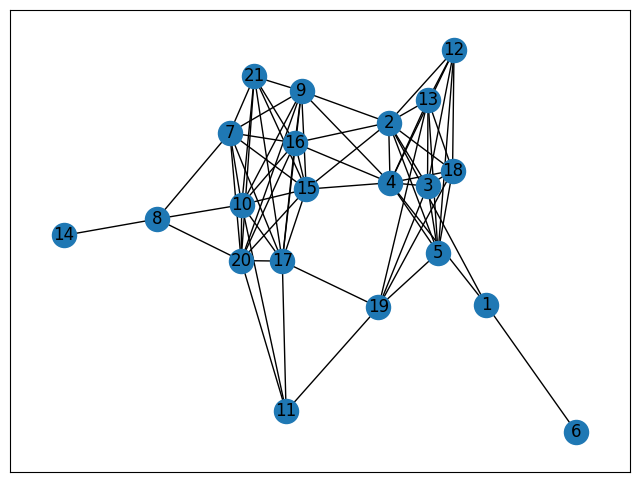

In [235]:
# plot graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
plt.show()

In [232]:
# page rank
pagerank = nx.pagerank(G)
measure_df = pd.DataFrame.from_dict(pagerank,
                                    orient='index',
                                    columns=['pagerank'])
measure_df = measure_df.sort_values(by='pagerank',
                                      ascending=False)
measure_df.head()

,pagerank
4,0.065903
2,0.065903
10,0.060429
20,0.060429
16,0.060023


In [233]:
# closeness centrality
close_centrality = nx.closeness_centrality(G)
measure_df['close_centrality'] = pd.Series(close_centrality)
measure_df = measure_df.sort_values(by='close_centrality',
                                      ascending=False)
measure_df.head()


,pagerank,close_centrality
16,0.060023,0.606061
15,0.060023,0.606061
9,0.060023,0.606061
4,0.065903,0.588235
2,0.065903,0.588235


In [234]:
# betweenness centrality
between_centrality = nx.betweenness_centrality(G)
measure_df['between_centrality'] = pd.Series(between_centrality)
measure_df = measure_df.sort_values(by='between_centrality',
                                      ascending=False)
measure_df.head()

,pagerank,close_centrality,between_centrality
4,0.065903,0.588235,0.196626
2,0.065903,0.588235,0.196626
1,0.031461,0.400000,0.100000
8,0.036007,0.370370,0.100000
15,0.060023,0.606061,0.099100


In [236]:
# degree centrality
degree_centrality = nx.degree_centrality(G)
measure_df['degree_centrality'] = pd.Series(degree_centrality)
measure_df = measure_df.sort_values(by='degree_centrality',
                                      ascending=False)
measure_df.head()

,pagerank,close_centrality,between_centrality,degree_centrality
4,0.065903,0.588235,0.196626,0.50
2,0.065903,0.588235,0.196626,0.50
9,0.060023,0.606061,0.099100,0.45
20,0.060429,0.512821,0.072837,0.45
10,0.060429,0.512821,0.072837,0.45


In [275]:
# cluster by k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(measure_df.iloc[:, [0,2]])
measure_df['cluster'] = kmeans.labels_
measure_df.head()


,pagerank,close_centrality,between_centrality,degree_centrality,cluster
4,0.065903,0.588235,0.196626,0.50,1
2,0.065903,0.588235,0.196626,0.50,1
9,0.060023,0.606061,0.099100,0.45,1
20,0.060429,0.512821,0.072837,0.45,1
10,0.060429,0.512821,0.072837,0.45,1


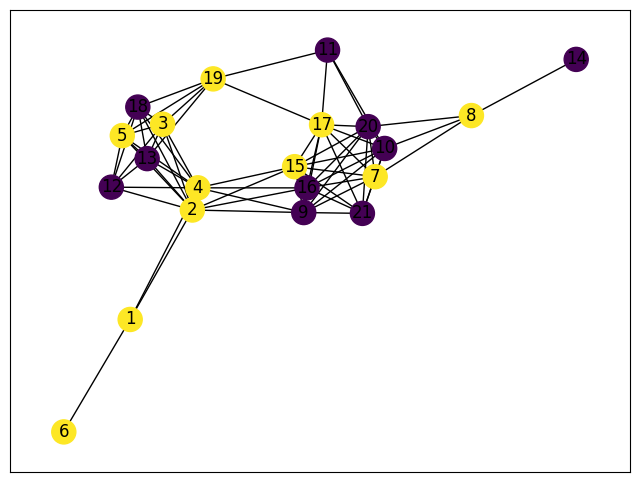

In [276]:
# plot graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True,
                 node_color=measure_df['cluster'])

<Axes: xlabel='area'>

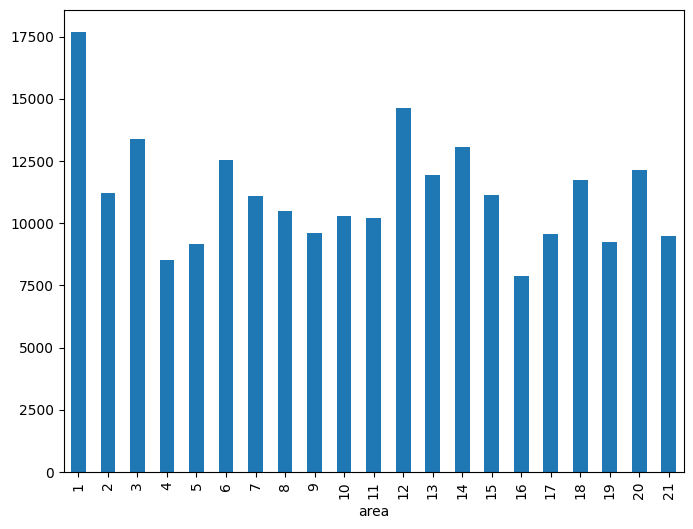

In [71]:
# total crime number by area in 2022
total_area_2022 = area_df[area_df['date_rptd'].dt.year == 2022]
total_area_2022 = total_area_2022.groupby(['area']).size()

# plot histogram graph
total_area_2022.plot(kind='bar', figsize=(8, 6))


In [63]:
# find corresponding area name for each area
area_name = crime_df.loc[:, ['area', 'area name']]
area_name = area_name.drop_duplicates()
area_name

,area,area name
0,3,Southwest
1,1,Central
3,15,N Hollywood
4,19,Mission
9,17,Devonshire
16,11,Northeast
17,5,Harbor
18,9,Van Nuys
23,10,West Valley
28,8,West LA
